<a href="https://colab.research.google.com/github/nithishpatel/Stock-market-analysis/blob/main/tatadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import datetime as dt
import math 
from math import acos,degrees

In [136]:
df= pd.read_csv('tata.csv',encoding = "ISO-8859-1")

In [137]:
df.head()

,scrip,date,time,Open,High,Low,Close,Volume,Unnamed: 8
0,TATASTEEL,24-06-2013,9:20,270.30,270.40,270.10,270.20,30794,NaN
1,TATASTEEL,24-06-2013,9:21,270.10,270.30,270.05,270.25,31049,NaN
2,TATASTEEL,24-06-2013,9:22,270.25,270.85,270.25,270.65,15813,NaN
3,TATASTEEL,24-06-2013,9:23,270.80,271.60,270.25,270.40,32092,NaN
4,TATASTEEL,24-06-2013,9:24,270.15,271.10,270.15,271.05,15286,NaN


In [138]:
df= df.iloc[::10,1:8]

In [139]:
day1_y=df['time'].iloc[0:37]
day1_y=day1_y.values

In [140]:
df.head()

,date,time,Open,High,Low,Close,Volume
0,24-06-2013,9:20,270.30,270.4,270.10,270.2,30794
10,24-06-2013,9:30,271.95,272.6,271.90,272.5,32683
20,24-06-2013,9:40,272.25,272.7,272.25,272.6,11347
30,24-06-2013,9:50,274.35,274.6,273.75,273.9,24191
40,24-06-2013,10:00,273.50,273.7,273.40,273.5,7056


In [141]:
dates=df.time.str.slice(0,5).astype(str)


In [143]:
df['time']=df.date+' '+df.time

In [144]:
df['time']=pd.to_datetime(df['time'])

In [146]:
avg1=df['Low']
avg2=df['High']
avg3=(avg1+avg2)/2
avg=pd.DataFrame(avg3)
avg.head()

,0
0,270.250
10,272.250
20,272.475
30,274.175
40,273.550


In [147]:
df['Average']= avg
df.head(500)

,date,time,Open,High,Low,Close,Volume,Average
0,24-06-2013,2013-06-24 09:20:00,270.30,270.40,270.10,270.20,30794,270.250
10,24-06-2013,2013-06-24 09:30:00,271.95,272.60,271.90,272.50,32683,272.250
20,24-06-2013,2013-06-24 09:40:00,272.25,272.70,272.25,272.60,11347,272.475
30,24-06-2013,2013-06-24 09:50:00,274.35,274.60,273.75,273.90,24191,274.175
40,24-06-2013,2013-06-24 10:00:00,273.50,273.70,273.40,273.50,7056,273.550
...,...,...,...,...,...,...,...,...
4950,18-02-2014,2014-02-18 10:35:00,379.90,380.00,379.65,379.65,5599,379.825
4960,18-02-2014,2014-02-18 10:45:00,378.80,378.95,378.70,378.75,5674,378.825
4970,18-02-2014,2014-02-18 10:55:00,379.20,379.25,379.00,379.00,2893,379.125
4980,18-02-2014,2014-02-18 11:05:00,379.30,379.50,379.20,379.20,4336,379.350


In [148]:
time=df['time']
time=pd.DataFrame(time)
time=time.values

In [149]:
df=df.set_index(df['time'])
df

,date,time,Open,High,Low,Close,Volume,Average
time,,,,,,,,
2013-06-24 09:20:00,24-06-2013,2013-06-24 09:20:00,270.30,270.40,270.10,270.20,30794,270.250
2013-06-24 09:30:00,24-06-2013,2013-06-24 09:30:00,271.95,272.60,271.90,272.50,32683,272.250
2013-06-24 09:40:00,24-06-2013,2013-06-24 09:40:00,272.25,272.70,272.25,272.60,11347,272.475
2013-06-24 09:50:00,24-06-2013,2013-06-24 09:50:00,274.35,274.60,273.75,273.90,24191,274.175
2013-06-24 10:00:00,24-06-2013,2013-06-24 10:00:00,273.50,273.70,273.40,273.50,7056,273.550
...,...,...,...,...,...,...,...,...
2019-03-29 14:50:00,29-03-2019,2019-03-29 14:50:00,521.00,521.15,519.95,520.05,94570,520.550
2019-03-29 15:00:00,29-03-2019,2019-03-29 15:00:00,521.60,522.15,521.60,522.00,37122,521.875
2019-03-29 15:10:00,29-03-2019,2019-03-29 15:10:00,520.60,520.90,520.50,520.70,37688,520.700


In [150]:
day1=df.loc['2013-06-24']
day2=df.loc['2013-06-26']
day3=df.loc['2014-03-02']
day4=df.loc['2014-04-02']
day5=df.loc['2014-06-02']
day6=df.loc['2014-10-02']
day7=df.loc['2014-02-13']
day8=df.loc['2014-02-14']
day9=df.loc['2014-02-18']
day10=df.loc['2014-02-19']

In [151]:
day1=day1.iloc[:,7:8].values
day2=day2.iloc[:,7:8].values
day3=day3.iloc[:,7:8].values
day4=day4.iloc[:,7:8].values
day5=day5.iloc[:,7:8].values
day6=day6.iloc[:,7:8].values
day7=day7.iloc[:,7:8].values
day8=day8.iloc[:,7:8].values
day9=day9.iloc[:,7:8].values
day10=day10.iloc[:,7:8].values

In [152]:
n=int(input())
for i in range(n):
  if n==1:
    print(((day1[4]-day1[19])/(day1[4]))*100)
    break
  elif n==2:
    print(((day2[4]-day2[19])/(day2[4]))*100)
    break
  elif n==3:
    print(((day3[4]-day3[19])/(day3[4]))*100)
    break
  elif n==4:
    print(((day4[4]-day4[19])/(day4[4]))*100)
    break
  elif n==5:
    print(((day5[4]-day5[19])/(day5[4]))*100)
    break
  elif n==6:
    print(((day6[4]-day6[19])/(day6[4]))*100)
    break
  elif n==7:
    print(((day7[4]-day7[19])/(day7[4]))*100)
    break
  elif n==8:
    print(((day8[4]-day8[19])/(day8[4]))*100)
    break
  elif n==9:
    print(((day9[4]-day9[19])/(day9[4]))*100)
    break
  elif n==10:
    print(((day10[4]-day10[19])/(day10[4]))*100)
    break



5
[2.26899945]


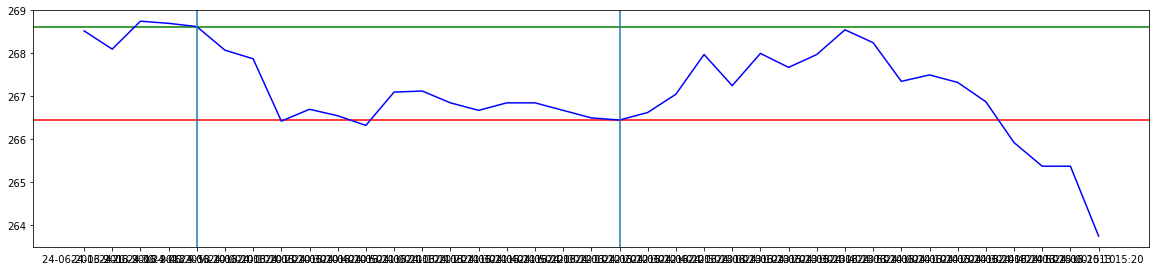

In [153]:
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.axhline(y=day2[4],color='g')
plt.axhline(y=day2[19],color='r')
plt.plot(day1_y,day2, color='blue', label='Tata Steel')
plt.axvline(x=4)
plt.axvline(x=19)